1.Construct and verify the performance of bi-level and multi-level confusion

matrix using Python.

Binary Confusion Matrix:
[[29 27]
 [21 23]]
Binary Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        56
           1       0.46      0.52      0.49        44

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.53      0.52      0.52       100



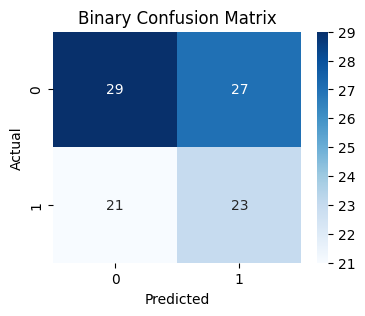

Multi-Class Confusion Matrix:
[[ 8  6  5  5]
 [ 7  6  6  8]
 [ 6  6  4  8]
 [ 5  7  3 10]]
Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.33      0.32        24
           1       0.24      0.22      0.23        27
           2       0.22      0.17      0.19        24
           3       0.32      0.40      0.36        25

    accuracy                           0.28       100
   macro avg       0.27      0.28      0.27       100
weighted avg       0.27      0.28      0.27       100



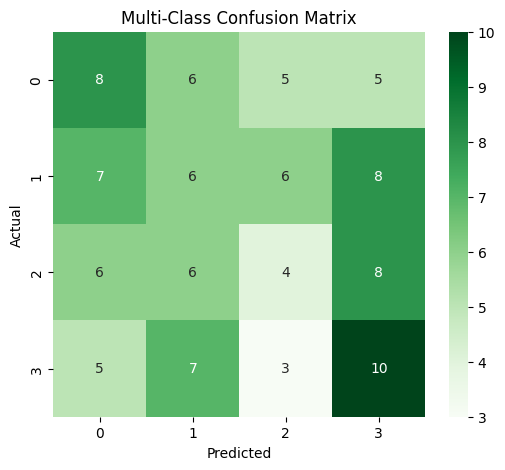

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y_true_binary = np.random.choice([0, 1], size=100)
y_pred_binary = np.random.choice([0, 1], size=100)

cm_binary = confusion_matrix(y_true_binary, y_pred_binary)
print("Binary Confusion Matrix:")
print(cm_binary)
print("Binary Classification Report:")
print(classification_report(y_true_binary, y_pred_binary))

plt.figure(figsize=(4, 3))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues")
plt.title("Binary Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_true_multi = np.random.choice([0, 1, 2, 3], size=100)
y_pred_multi = np.random.choice([0, 1, 2, 3], size=100)

cm_multi = confusion_matrix(y_true_multi, y_pred_multi)
print("Multi-Class Confusion Matrix:")
print(cm_multi)
print("Multi-Class Classification Report:")
print(classification_report(y_true_multi, y_pred_multi))

plt.figure(figsize=(6, 5))
sns.heatmap(cm_multi, annot=True, fmt="d", cmap="Greens")
plt.title("Multi-Class Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


2.Verification of the overfitting issue by using a chosen numerical database using Python.



In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print("=== Overfitting Check ===")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")

if train_rmse < test_rmse * 0.5:
    print("⚠️ Possible Overfitting Detected: Model performs much better on training data.")
else:
    print("✅ No significant overfitting detected.")


=== Overfitting Check ===
Train RMSE: 0.00
Test RMSE : 75.48
⚠️ Possible Overfitting Detected: Model performs much better on training data.


3.Analysing the performance of linear regression process using a chosen

numerical database using Python.


=== Linear Regression Performance ===
Train RMSE: 53.56
Test RMSE : 53.85
Train R² Score: 0.53
Test R² Score : 0.45


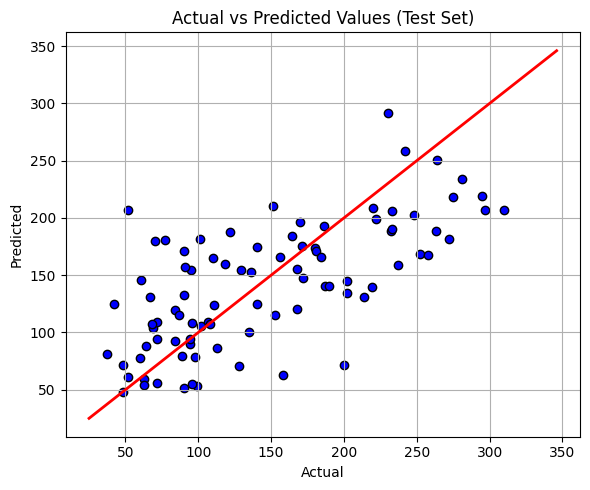

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data = load_diabetes()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("=== Linear Regression Performance ===")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE : {rmse_test:.2f}")
print(f"Train R² Score: {r2_train:.2f}")
print(f"Test R² Score : {r2_test:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


4.Analysing the performance of logistic regression process using a chosen

numerical database using Python

=== Logistic Regression Performance ===
Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



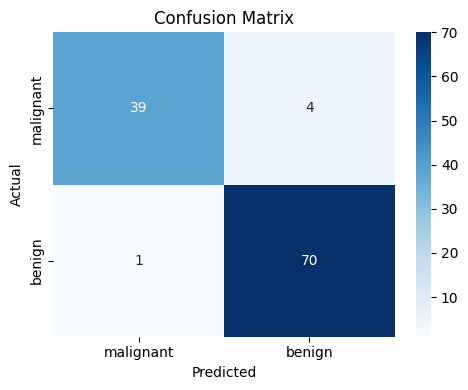

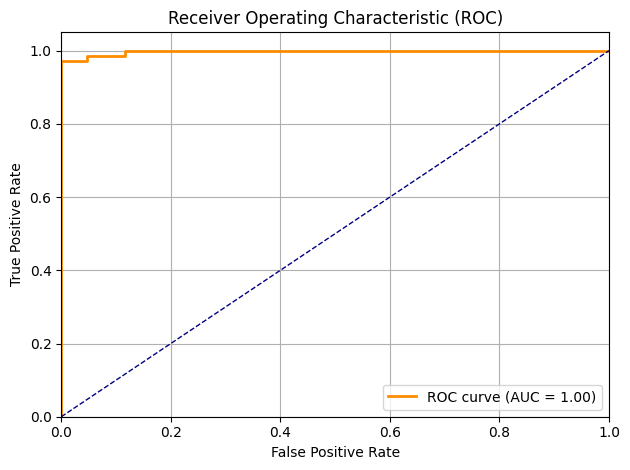

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


5.Demonstrating the performance of gradient descent algorithm using Python


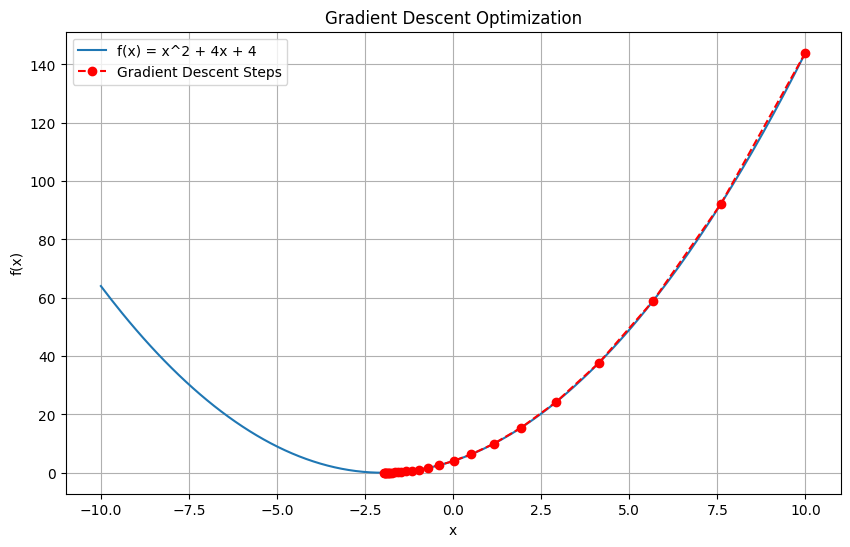

Minimum value of x found: -1.9547
f(x) at minimum: 0.0021


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 4*x + 4

def f_prime(x):
    return 2*x + 4

def gradient_descent(starting_point, learning_rate, num_iterations):
    x = starting_point
    x_history = [x]

    for i in range(num_iterations):
        grad = f_prime(x)
        x = x - learning_rate * grad
        x_history.append(x)

    return x, x_history

initial_x = 10
alpha = 0.1
iterations = 25

final_x, x_steps = gradient_descent(initial_x, alpha, iterations)

x_vals = np.linspace(-10, 10, 200)
y_vals = f(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4x + 4')
plt.plot(x_steps, [f(x) for x in x_steps], 'ro--', label='Gradient Descent Steps')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Minimum value of x found: {final_x:.4f}")
print(f"f(x) at minimum: {f(final_x):.4f}")


6.Verifying the performance of a image pre-processing with Otsu’s function using

Python

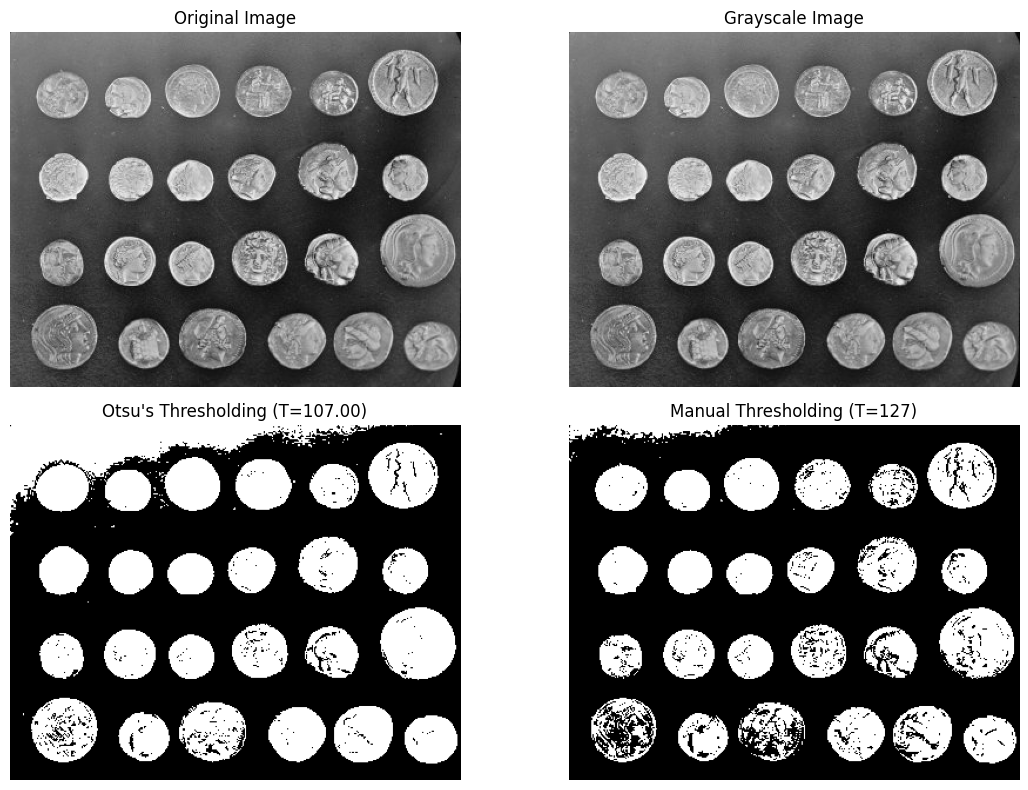

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import data # Import skimage data

# Load a sample image from scikit-image as a placeholder
# Replace this with your actual image loading code:
# img = cv2.imread('path/to/your/image.jpg')
img = data.coins() # Using a sample image from skimage

# Convert to grayscale if the loaded image is color
if len(img.shape) == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img # If the image is already grayscale

ret_otsu, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

manual_threshold = 127
ret_manual, manual_thresh = cv2.threshold(gray, manual_threshold, 255, cv2.THRESH_BINARY)

titles = ['Original Image', 'Grayscale Image',
          f"Otsu's Thresholding (T={ret_otsu:.2f})",
          f'Manual Thresholding (T={manual_threshold})']
images = [img, gray, otsu_thresh, manual_thresh]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    # Use 'gray' colormap for grayscale images
    cmap = 'gray' if len(images[i].shape) == 2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

7.Verifying the performance of a image pre-processing with watershed algorithm

using Python

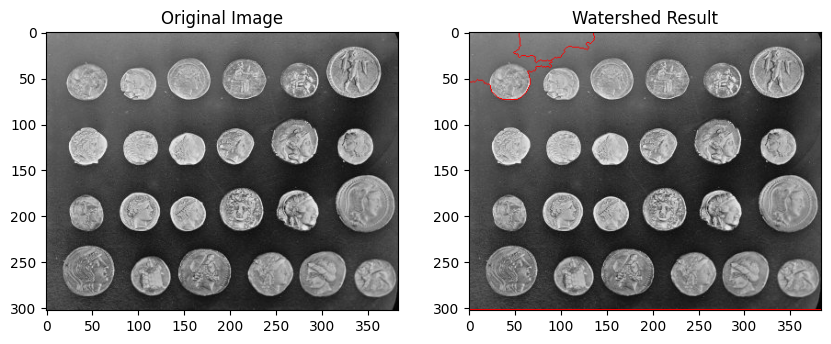

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data # Import skimage data

# Step 1: Load image
# Replace this with your actual image loading code:
# img = cv2.imread('path/to/your/image.jpg')
img = data.coins() # Using a sample image from skimage

# Convert to BGR if the loaded image is grayscale for watershed
if len(img.shape) == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)


original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 3: Morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 4: Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 5: Sure foreground (using distance transform)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 6: Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 7: Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # So that sure background is not 0, but 1
markers[unknown == 255] = 0  # Mark unknown region as 0

# Step 8: Apply watershed
markers = cv2.watershed(img, markers)

# Step 9: Visualize the results
img[markers == -1] = [255, 0, 0]  # Mark boundaries in red

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(original, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(img, cmap='gray'), plt.title('Watershed Result')
plt.show()

10.Performance evaluation of Linear regression Classifier using Breast cancer or

Iris database

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and convert to class labels
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))


Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



11.Performance evaluation of Logistic regression Classifier using Breast cancer or

Iris database

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase iterations for convergence
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



12.Performance evaluation of Random Forest Classifier using Breast cancer or Iris

database

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



13.Performance evaluation of Decision Tree Classifier using Breast cancer or Iris

database

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



14.Performance evaluation of K-Nearest Neighbor Classifier using Breast cancer or

Iris database

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



15.Performance evaluation of Support Vector Machine Classifier using Breast

cancer or Iris database

accuracy: 0.9666666666666667


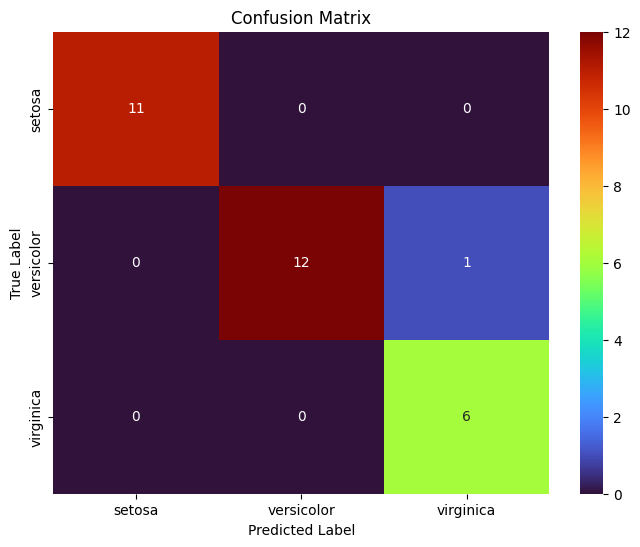

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
iris=load_iris()
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
data['Species']=iris.target
x=data.drop('Species',axis=1)
y=data['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
model=SVC(kernel='poly',random_state=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


16.Implementing the Hyper parameter Tuning on a chosen neural network scheme

and verifying the change in the attained output.

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.006105402296585327)}
Best score is 0.853


17.Implementing Convolutional Neural Network (CNN) models to execute the

binary classification using Softmax classifier using Python

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist # Import MNIST dataset

# Step 1: Load and preprocess MNIST data for binary classification (e.g., 0s and 1s)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter for two classes (e.g., 0 and 1)
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

X_train, y_train = x_train[train_filter], y_train[train_filter]
X_test, y_test = x_test[test_filter], y_test[test_filter]

# Reshape and normalize data
img_height, img_width = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1).astype('float32') / 255

# Convert labels to categorical (Softmax requires one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)


# Step 2: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Softmax for 2 classes
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Required for softmax with 2 classes
              metrics=['accuracy'])

# Step 4: Train the model
print("Training CNN model on MNIST binary data (0s and 1s)...")
model.fit(X_train, y_train_categorical, epochs=5, batch_size=32, validation_split=0.1, verbose=1) # Reduced epochs for quicker demo

# Step 5: Evaluate the model
print("\nEvaluating model on test data...")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Step 6: Print classification report
print("\n✅ Classification Report:\n", classification_report(y_true, y_pred))
print("✅ Accuracy:", accuracy_score(y_true, y_pred))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training CNN model on MNIST binary data (0s and 1s)...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9828 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 3.9027e-04
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9984 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 2.1728e-04
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 4.1538e-05
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.5572e-06
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9997 - loss: 7.4959e-04 - val_accuracy: 1.0000 - val_loss: 5.0890e-06

Evaluating model on test data...
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.0

18.Implementing Convolutional Neural Network (CNN) models to execute the
binary classification with varied values of; batch size, optimizer, activation
function and learning rate using Python

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist # Import MNIST dataset

# Step 1: Load and preprocess MNIST data for binary classification (e.g., 0s and 1s)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter for two classes (e.g., 0 and 1)
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

X_train, y_train = x_train[train_filter], y_train[train_filter]
X_test, y_test = x_test[test_filter], y_test[test_filter]

# Reshape and normalize data
img_height, img_width = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, 1).astype('float32') / 255

# Convert labels to categorical (Softmax requires one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)


# Step 2: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Softmax for 2 classes
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Required for softmax with 2 classes
              metrics=['accuracy'])

# Step 4: Train the model
print("Training CNN model on MNIST binary data (0s and 1s)...")
model.fit(X_train, y_train_categorical, epochs=5, batch_size=32, validation_split=0.1, verbose=1) # Reduced epochs for quicker demo

# Step 5: Evaluate the model
print("\nEvaluating model on test data...")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

# Step 6: Print classification report
print("\n✅ Classification Report:\n", classification_report(y_true, y_pred))
print("✅ Accuracy:", accuracy_score(y_true, y_pred))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model on MNIST binary data (0s and 1s)...
Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9771 - loss: 0.0739 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9982 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 4.6084e-04
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 3.3589e-04
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 3.8510e-05
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.0740e-05

Evaluating model on test data...
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy        

19.Implementing Convolutional Neural Network (CNN) models to achieve the

segmentation (UNet) using Python

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(2)(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(2)(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(2)(c3)

    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(2)(c4)

    # Bottleneck
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Decoder
    u6 = Conv2DTranspose(512, 2, strides=2, padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, 2, strides=2, padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, 2, strides=2, padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, 2, strides=2, padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(c9)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(c9)  # Sigmoid for binary segmentation

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_7[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_10[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 16, 16,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_8[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_12[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 8, 8, 512) │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_9[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_14[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_15[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

20.Verifying the performance of BoltzMann machine, Recurrent Neural Network,
Long-Short term memory (LSTM) using a chosen database with Python

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize pixel values to [0,1]
y = mnist.target.astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("\nTraining RBM + Logistic Regression pipeline...")

# Create RBM with 256 components/features
rbm = BernoulliRBM(n_components=256, learning_rate=0.01, batch_size=100, n_iter=10, random_state=42)

# Logistic Regression classifier
logistic = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# Pipeline: RBM feature extraction + Logistic Regression classification
rbm_pipeline = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

rbm_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_rbm = rbm_pipeline.predict(X_test)
print("RBM + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_rbm))
print(classification_report(y_test, y_pred_rbm))



print("\nTraining Simple RNN...")

# Reshape data for RNN: (samples, timesteps, features)
# Here, each image row (28 pixels) is a timestep with 28 features (columns)
X_train_rnn = X_train.values.reshape(-1, 28, 28)
X_test_rnn = X_test.values.reshape(-1, 28, 28)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build simple RNN model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(28, 28), activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_model.fit(X_train_rnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate RNN
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test_cat, verbose=0)
print(f"Simple RNN Test Accuracy: {rnn_scores[1]:.4f}")



print("\nTraining LSTM...")

lstm_model = Sequential([
    LSTM(64, input_shape=(28, 28), activation='tanh'),
    Dense(10, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(X_train_rnn, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate LSTM
lstm_scores = lstm_model.evaluate(X_test_rnn, y_test_cat, verbose=0)
print(f"LSTM Test Accuracy: {lstm_scores[1]:.4f}")


Loading MNIST dataset...

Training RBM + Logistic Regression pipeline...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RBM + Logistic Regression Accuracy: 0.9562857142857143
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.99      0.98      1600
           2       0.95      0.94      0.95      1380
           3       0.94      0.94      0.94      1433
           4       0.96      0.95      0.96      1295
           5       0.95      0.95      0.95      1273
           6       0.97      0.98      0.97      1396
           7       0.96      0.95      0.96      1503
           8       0.94      0.94      0.94      1357
           9       0.93      0.95      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


Training Simple RNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
394/394 - 9s - 22ms/step - accuracy: 0.7220 - loss: 0.8326 - val_accuracy: 0.8704 - val_loss: 0.4197
Epoch 2/5
394/394 - 7s - 18ms/step - accuracy: 0.9018 - loss: 0.3272 - val_accuracy: 0.9239 - val_loss: 0.2633
Epoch 3/5
394/394 - 4s - 10ms/step - accuracy: 0.9243 - loss: 0.2511 - val_accuracy: 0.9389 - val_loss: 0.2109
Epoch 4/5
394/394 - 5s - 14ms/step - accuracy: 0.9353 - loss: 0.2130 - val_accuracy: 0.9434 - val_loss: 0.1889
Epoch 5/5
394/394 - 4s - 10ms/step - accuracy: 0.9444 - loss: 0.1854 - val_accuracy: 0.9495 - val_loss: 0.1674
Simple RNN Test Accuracy: 0.9490

Training LSTM...
Epoch 1/5
394/394 - 19s - 48ms/step - accuracy: 0.7712 - loss: 0.7160 - val_accuracy: 0.9248 - val_loss: 0.2624
Epoch 2/5
394/394 - 16s - 40ms/step - accuracy: 0.9355 - loss: 0.2147 - val_accuracy: 0.9479 - val_loss: 0.1788
Epoch 3/5
394/394 - 15s - 39ms/step - accuracy: 0.9576 - loss: 0.1430 - val_accuracy: 0.9630 - val_loss: 0.1216
Epoch 4/5
394/394 - 15s - 39ms/step - accuracy: 0.9660 - l

21.Performance verification of NN-model using the Two-class data.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Generate synthetic two-class data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           n_informative=15, n_redundant=5, random_state=42)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: One-hot encode the labels for Keras
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Step 4: Build a simple NN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # 2 output neurons for binary classification with softmax
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Step 6: Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print performance metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5003 - loss: 1.8291 - val_accuracy: 0.5875 - val_loss: 0.9686
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5288 - loss: 0.9053 - val_accuracy: 0.6375 - val_loss: 0.6689
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6605 - loss: 0.6540 - val_accuracy: 0.7250 - val_loss: 0.5178
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7138 - loss: 0.5788 - val_accuracy: 0.7875 - val_loss: 0.4403
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8151 - loss: 0.4102 - val_accuracy: 0.8625 - val_loss: 0.3952
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8003 - loss: 0.4163 - val_accuracy: 0.8750 - val_loss: 0.3684
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8554 - loss: 0.3522 - val_accuracy: 0.8750 - val_loss: 0.3505
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8905 - loss: 0.3132 - val_accuracy: 0.9000 - val_loss: 0.3293
Ep

22.Performance verification of NN-model using the multi-class data.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Generate synthetic multi-class data
X, y = make_classification(
    n_samples=1500,
    n_features=20,
    n_classes=4,          # Multi-class: 4 classes
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: One-hot encode target labels for Keras
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# Step 4: Build the NN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 neurons for 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 5: Train the model
model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Step 6: Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Step 7: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3412 - loss: 1.8660 - val_accuracy: 0.4417 - val_loss: 1.1835
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 1.0183 - val_accuracy: 0.5667 - val_loss: 1.0038
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6956 - loss: 0.8323 - val_accuracy: 0.6000 - val_loss: 0.9213
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7113 - loss: 0.7397 - val_accuracy: 0.6583 - val_loss: 0.8510
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7487 - loss: 0.6918 - val_accuracy: 0.6917 - val_loss: 0.7977
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8008 - loss: 0.5909 - val_accuracy: 0.6833 - val_loss: 0.7620
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7953 - loss: 0.5610 - val_accuracy: 0.7083 - val_loss: 0.7249
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8513 - loss: 0.4582 - val_accuracy: 0.7083 - val_loss: 0.7012
Ep

23.Performance verification of NN-model using the circular data.

In [ ]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Generate circular data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (important for NN performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: One-hot encode labels
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

# Step 5: Build NN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),  # 2 features in input
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Step 7: Predict and evaluate
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4882 - loss: 0.7445 - val_accuracy: 0.5625 - val_loss: 0.6889
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4098 - loss: 0.6964 - val_accuracy: 0.4375 - val_loss: 0.6664
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4740 - loss: 0.6722 - val_accuracy: 0.4875 - val_loss: 0.6491
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4985 - loss: 0.6573 - val_accuracy: 0.5000 - val_loss: 0.6313
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 0.6328 - val_accuracy: 0.5750 - val_loss: 0.6097
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6203 - loss: 0.6129 - val_accuracy: 0.6875 - val_loss: 0.5841
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6860 - loss: 0.5791 - val_accuracy: 0.7500 - val_loss: 0.5525
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.5304 - val_accuracy: 0.8625 - val_loss: 0.51

24 Performance verification of NN-model using the spiral data.

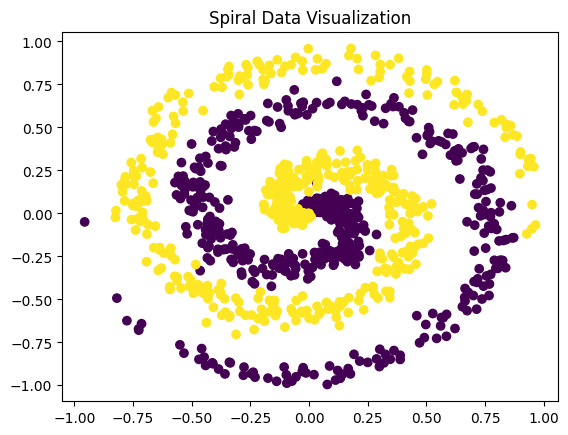

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5297 - loss: 0.6842 - val_accuracy: 0.5500 - val_loss: 0.6792
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6213 - loss: 0.6722 - val_accuracy: 0.6125 - val_loss: 0.6701
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6459 - loss: 0.6603 - val_accuracy: 0.6375 - val_loss: 0.6763
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6432 - loss: 0.6645 - val_accuracy: 0.6500 - val_loss: 0.6661
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6792 - loss: 0.6515 - val_accuracy: 0.6500 - val_loss: 0.6752
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6618 - loss: 0.6566 - val_accuracy: 0.5750 - val_loss: 0.6604
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6297 - loss: 0.6677 - val_accuracy: 0.6375 - val_loss: 0.6699
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6393 - loss: 0.6718 - val_accuracy: 0.6125 - val_loss: 0.6625
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.88

Confusion Matrix:
 [[79 17]
 [ 7 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        96
           1       0.85      0.93      0.89       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Function to generate spiral data
def generate_spiral_data(points_per_class, noise=0.2):
    N = points_per_class
    D = 2  # dimensionality
    K = 2  # number of classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')

    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * noise  # theta
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j
    return X, y

# Generate data
X, y = generate_spiral_data(points_per_class=500, noise=0.2)

# Visualize spiral data
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Spiral Data Visualization")
plt.show()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels for Keras
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


25 Verification of NN-Model with various activation functions and model structure.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Spiral data generation function (reuse from before)
def generate_spiral_data(points_per_class, noise=0.2):
    N = points_per_class
    D = 2  # dimensionality
    K = 2  # classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = j
    return X, y

# Generate and preprocess data
X, y = generate_spiral_data(500, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Helper function to build and train model
def build_and_train_model(activation, layers_config):
    """
    activation: activation function for hidden layers (str)
    layers_config: list of neurons in each hidden layer, e.g. [32, 32, 16]
    """
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(Dense(layers_config[0], activation=activation, input_shape=(2,)))
    for neurons in layers_config[1:]:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))  # output layer for 2 classes

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, verbose=0, validation_split=0.1)
    loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    return accuracy

# Define different experiments
experiments = [
    {'activation': 'relu', 'layers': [32]},
    {'activation': 'relu', 'layers': [64, 32]},
    {'activation': 'relu', 'layers': [128, 64, 32]},
    {'activation': 'tanh', 'layers': [32]},
    {'activation': 'tanh', 'layers': [64, 32]},
    {'activation': 'tanh', 'layers': [128, 64, 32]},
    {'activation': 'sigmoid', 'layers': [32]},
    {'activation': 'sigmoid', 'layers': [64, 32]},
    {'activation': 'sigmoid', 'layers': [128, 64, 32]},
]

# Run experiments and print results
print("Activation\tLayers\t\tTest Accuracy")
for exp in experiments:
    acc = build_and_train_model(exp['activation'], exp['layers'])
    print(f"{exp['activation']}\t\t{exp['layers']}\t{acc:.4f}")


Activation	Layers		Test Accuracy


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


relu		[32]	0.5900
relu		[64, 32]	0.6450
relu		[128, 64, 32]	0.9200
tanh		[32]	0.5600
tanh		[64, 32]	0.5550
tanh		[128, 64, 32]	0.5450
sigmoid		[32]	0.5500
sigmoid		[64, 32]	0.5400
sigmoid		[128, 64, 32]	0.5650
